<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:

movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [6]:
# Answer:

movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:

moviedur = movies[["title", "duration"]]
sorted = moviedur.sort_values(by = "duration")

print(f'Shortest Movie by Duration:', sorted.head(1))
print(f'Longest Movie by Duration:', sorted.tail(1))


Shortest Movie by Duration:       title  duration
389  Freaks        64
Longest Movie by Duration:       title  duration
476  Hamlet       242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

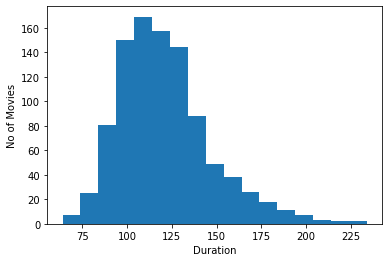

In [8]:
# Answer:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = movies['duration']

plt.hist(data, bins = np.arange(min(data), max(data), 10))

plt.xlabel('Duration')
plt.ylabel('No of Movies')

plt.show()


#### Use a box plot to display that same data.

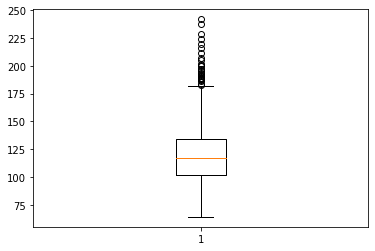

In [9]:
# Answer:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = movies['duration']
plt.boxplot

fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:

##movies.groupby("content_rating").size()

movies2 = movies\
    .groupby(["content_rating"])[["title"]]\
    .count()\
    .sort_values(["content_rating"], ascending=False)

movies2


,title
content_rating,
X,4
UNRATED,38
TV-MA,1
R,460
PG-13,189
PG,123
PASSED,7
NOT RATED,65
NC-17,7


#### Use a visualization to display that same data, including a title and x and y labels.

<AxesSubplot:title={'center':'Number of Movie Titles by Content Rating'}, xlabel='Content Rating', ylabel='Movie Titles'>

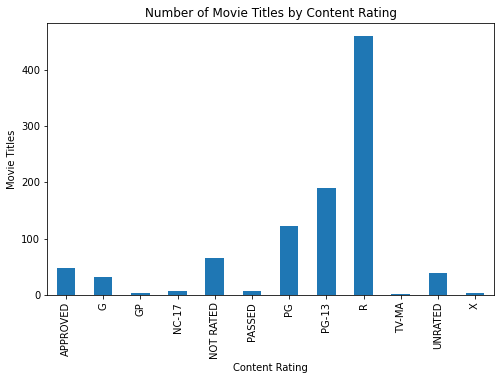

In [11]:
# Answer:

## to make graph look bigger in Jupyter NB
%matplotlib inline  

movies2 = movies\
    .groupby(["content_rating"])[["title"]]\
    .count()\
    .sort_values(["content_rating"], ascending=True)

## resizing
movies2.plot.bar(figsize=(8,5), title = "Number of Movie Titles by Content Rating", xlabel = "Content Rating", ylabel = "Movie Titles", legend=False)

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:

movies.loc[(movies['content_rating'] =="NOT RATED") \
         | (movies['content_rating'] =="APPROVED") \
         | (movies['content_rating'] =="PASSED") \
         | (movies['content_rating'] =="GP")]


,star_rating,title,content_rating,genre,duration,actors_list
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
22,8.7,It's a Wonderful Life,APPROVED,Drama,130,"[u'James Stewart', u'Donna Reed', u'Lionel Bar..."
29,8.6,City Lights,PASSED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
38,8.6,Rear Window,APPROVED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C..."
...,...,...,...,...,...,...
827,7.5,The Wind That Shakes the Barley,NOT RATED,Drama,127,"[u'Cillian Murphy', u'Padraic Delaney', u'Liam..."
844,7.5,Pinocchio,APPROVED,Animation,88,"[u'Dickie Jones', u'Christian Rub', u'Mel Blanc']"
866,7.5,To Catch a Thief,APPROVED,Mystery,106,"[u'Cary Grant', u'Grace Kelly', u'Jessie Royce..."
896,7.5,From Russia with Love,APPROVED,Action,115,"[u'Sean Connery', u'Robert Shaw', u'Lotte Lenya']"


In [13]:
movies["content_rating"].replace({"NOT RATED": "UNRATED", "APPROVED": "UNRATED", "PASSED": "UNRATED",  "GP": "UNRATED"}, inplace=True)

movies[["content_rating"]].groupby("content_rating").agg({"content_rating": np.size})

,content_rating
content_rating,
G,32
NC-17,7
PG,123
PG-13,189
R,460
TV-MA,1
UNRATED,160
X,4


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [14]:
# Answer:

movies["content_rating"].replace({"X": "NC-17", "TV-MA": "NC-17"}, inplace=True)

movies[["content_rating"]].groupby("content_rating").agg({"content_rating": np.size})

,content_rating
content_rating,
G,32
NC-17,12
PG,123
PG-13,189
R,460
UNRATED,160


#### Count the number of missing values in each column.

In [15]:
# Answer:

movies.isnull().sum()

## 3 records with missing values under column content_rating

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [16]:
#check details

print(movies[movies.isnull().any(axis=1)].head())

## records 187,649, 936 having missing values


     star_rating                               title content_rating  \
187          8.2  Butch Cassidy and the Sundance Kid            NaN   
649          7.7                   Where Eagles Dare            NaN   
936          7.4                           True Grit            NaN   

         genre  duration                                        actors_list  
187  Biography       110  [u'Paul Newman', u'Robert Redford', u'Katharin...  
649     Action       158  [u'Richard Burton', u'Clint Eastwood', u'Mary ...  
936  Adventure       128    [u'John Wayne', u'Kim Darby', u'Glen Campbell']  


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [17]:
# Answer:

movies["content_rating"].fillna("UNRATED", inplace = True)

In [18]:
#check details/validating record

movies.loc[[187,649, 936]]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,UNRATED,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,UNRATED,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [24]:
# Answer:

df1 = movies[(movies["duration"] >= 120)].star_rating.mean()

df2 = movies[(movies["duration"] < 120)].star_rating.mean()

print(f'Avg Star Rating of Movies with Durations of 2 hours or more:', df1)

print(f'Avg Star Rating of Movies with Durations of less than 2 hours:', df2)


Avg Star Rating of Movies with Durations of 2 hours or more: 7.948898678414082
Avg Star Rating of Movies with Durations of less than 2 hours: 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

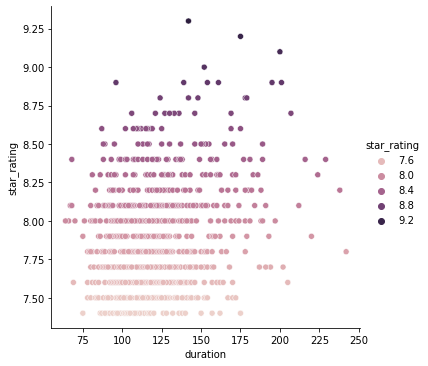

In [23]:
# Answer:

import seaborn as sns
movies2 = movies\
    .groupby(["star_rating", "duration"])\
    .count()\
    .sort_values(["star_rating"], ascending=True)

#movies2
sns.relplot(x= "duration", y="star_rating", hue="star_rating", data = movies2)


#### Calculate the average duration for each genre.

In [19]:
# Answer:

movies[["genre", "duration"]].groupby("genre").agg({"duration": np.mean})


,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

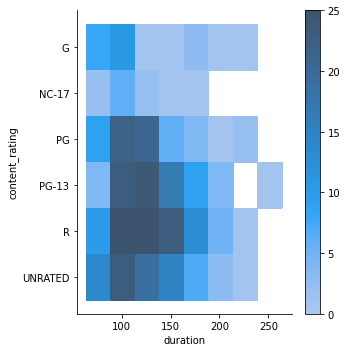

In [22]:
# Answer:

import seaborn as sns
movies2 = movies\
    .groupby(["content_rating", "duration"])[["title"]]\
    .count()\
    .sort_values(["content_rating"], ascending=True)

sns.displot(movies2, x="duration", y="content_rating", binwidth=(25,5), cbar=True)

#### Determine the top rated movie (by star rating) for each genre.

In [26]:
# Answer:

movies[["genre", "title", "star_rating"]].groupby('genre').head(1).reset_index(drop=True)

## to validate
#movies.loc[(movies['genre'] == "Action") ]
           

,genre,title,star_rating
0,Crime,The Shawshank Redemption,9.3
1,Action,The Dark Knight,9.0
2,Drama,12 Angry Men,8.9
3,Western,"The Good, the Bad and the Ugly",8.9
4,Adventure,The Lord of the Rings: The Return of the King,8.9
5,Biography,Schindler's List,8.9
6,Comedy,Life Is Beautiful,8.6
7,Animation,Spirited Away,8.6
8,Mystery,Rear Window,8.6
9,Horror,Psycho,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [27]:
# Answer:

dup = movies.duplicated(subset = ['title'])

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!